# Cat Breeds Dataset - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Cat Breeds Dataset from Kaggle.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Data Loading and Overview](#loading)
3. [Dataset Statistics](#statistics)
4. [Class Imbalance Analysis](#imbalance)
5. [Image Analysis](#images)
6. [Visualizations](#visualizations)
7. [Data Quality Checks](#quality)
8. [Summary and Recommendations](#summary)

## 1. Setup and Imports <a id='setup'></a>

In [1]:
# Standard libraries
import os
import glob
import warnings
from pathlib import Path

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing
from PIL import Image

# Machine learning utilities
from sklearn.utils.class_weight import compute_class_weight

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Data Loading and Overview <a id='loading'></a>

In [2]:
# Define paths
DATA_DIR = Path('data')
IMAGES_DIR = DATA_DIR / 'images'
CSV_PATH = DATA_DIR / 'data' / 'cats.csv'

print(f"Data directory: {DATA_DIR}")
print(f"Images directory: {IMAGES_DIR}")
print(f"CSV file: {CSV_PATH}")
print(f"\nDirectories exist: {IMAGES_DIR.exists()}")

Data directory: data
Images directory: data/images
CSV file: data/data/cats.csv

Directories exist: True


In [3]:
# Explore directory structure
breed_folders = sorted([f for f in os.listdir(IMAGES_DIR) if os.path.isdir(IMAGES_DIR / f)])

print(f"Total number of breed folders: {len(breed_folders)}")
print(f"\nFirst 10 breeds:")
for i, breed in enumerate(breed_folders[:10], 1):
    print(f"{i:2d}. {breed}")

Total number of breed folders: 67

First 10 breeds:
 1. Abyssinian
 2. American Bobtail
 3. American Curl
 4. American Shorthair
 5. American Wirehair
 6. Applehead Siamese
 7. Balinese
 8. Bengal
 9. Birman
10. Bombay


In [4]:
# Load CSV metadata if available
if CSV_PATH.exists():
    df_csv = pd.read_csv(CSV_PATH)
    print(f"CSV file loaded: {df_csv.shape}")
    print(f"\nFirst few rows:")
    display(df_csv.head())
    print(f"\nColumn names: {list(df_csv.columns)}")
    print(f"\nData types:")
    print(df_csv.dtypes)
else:
    print("No CSV metadata file found.")
    df_csv = None

CSV file loaded: (67145, 11)

First few rows:


Unnamed: 0        id                                                url  \
0           0  46744842  https://www.petfinder.com/cat/arianna-46744842...   
1           1  46717321  https://www.petfinder.com/cat/ozzy-46717321/oh...   
2           2  46626338  https://www.petfinder.com/cat/zena-46626338/ca...   
3           3  46620170  https://www.petfinder.com/cat/mika-46620170/ca...   
4           4  46582751  https://www.petfinder.com/cat/ruby-46582751/fl...   

  type     age  gender         size   coat       breed  \
0  Cat   Adult  Female       Medium    NaN  Abyssinian   
1  Cat   Adult    Male  Extra Large    NaN  Abyssinian   
2  Cat  Senior  Female       Medium    NaN  Abyssinian   
3  Cat    Baby  Female        Small  Short  Abyssinian   
4  Cat   Young  Female       Medium    NaN  Abyssinian   

                                              photos  \
0  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...   
1  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...   
2  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...   
3  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...   
4  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...   

                                          med_photos  
0  ['https://dl5zpyw5k3jeb.cloudfront.net/photos/...  
1  ['https://dl5zpyw5k3jeb.cloudfront.net/photos/...  
2  ['https://dl5zpyw5k3jeb.cloudfront.net/photos/...  
3  ['https://dl5zpyw5k3jeb.cloudfront.net/photos/...  
4  ['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


Column names: ['Unnamed: 0', 'id', 'url', 'type', 'age', 'gender', 'size', 'coat', 'breed', 'photos', 'med_photos']

Data types:
Unnamed: 0     int64
id             int64
url           object
type          object
age           object
gender        object
size          object
coat          object
breed         object
photos        object
med_photos    object
dtype: object


In [5]:
# Create metadata DataFrame from image files
print("Creating metadata from image files...")

image_data = []

for breed in breed_folders:
    breed_path = IMAGES_DIR / breed
    image_files = list(breed_path.glob('*.jpg')) + list(breed_path.glob('*.jpeg')) + list(breed_path.glob('*.png'))
    
    for img_path in image_files:
        image_data.append({
            'breed': breed,
            'file_path': str(img_path),
            'file_name': img_path.name,
            'file_size_bytes': img_path.stat().st_size
        })

df_images = pd.DataFrame(image_data)
print(f"\n✓ Metadata DataFrame created with {len(df_images)} images")
display(df_images.head(10))

Creating metadata from image files...

✓ Metadata DataFrame created with 126607 images


breed                                file_path         file_name  \
0  Abyssinian  data/images/Abyssinian/38400864_231.jpg  38400864_231.jpg   
1  Abyssinian   data/images/Abyssinian/44972038_99.jpg   44972038_99.jpg   
2  Abyssinian  data/images/Abyssinian/37771828_235.jpg  37771828_235.jpg   
3  Abyssinian  data/images/Abyssinian/38646425_225.jpg  38646425_225.jpg   
4  Abyssinian   data/images/Abyssinian/45995845_64.jpg   45995845_64.jpg   
5  Abyssinian   data/images/Abyssinian/46056661_28.jpg   46056661_28.jpg   
6  Abyssinian  data/images/Abyssinian/38536938_229.jpg  38536938_229.jpg   
7  Abyssinian   data/images/Abyssinian/46002248_37.jpg   46002248_37.jpg   
8  Abyssinian  data/images/Abyssinian/43916776_123.jpg  43916776_123.jpg   
9  Abyssinian   data/images/Abyssinian/45994758_62.jpg   45994758_62.jpg   

   file_size_bytes  
0            13970  
1            15890  
2            22319  
3            16904  
4            15656  
5            21144  
6            12641  
7            13715  
8            11722  
9            10521

In [6]:
# Add image dimensions and properties
print("Extracting image properties (this may take a few minutes)...")

widths = []
heights = []
modes = []
corrupted_indices = []

for idx, row in df_images.iterrows():
    try:
        with Image.open(row['file_path']) as img:
            widths.append(img.width)
            heights.append(img.height)
            modes.append(img.mode)
    except Exception as e:
        widths.append(None)
        heights.append(None)
        modes.append(None)
        corrupted_indices.append(idx)
    
    if (idx + 1) % 5000 == 0:
        print(f"  Processed {idx + 1}/{len(df_images)} images...")

df_images['width'] = widths
df_images['height'] = heights
df_images['mode'] = modes
df_images['aspect_ratio'] = df_images['width'] / df_images['height']
df_images['file_size_mb'] = df_images['file_size_bytes'] / (1024 * 1024)

print(f"\n✓ Image properties extracted")
print(f"Corrupted/unreadable images: {len(corrupted_indices)}")
display(df_images.head())

Extracting image properties (this may take a few minutes)...
  Processed 5000/126607 images...
  Processed 10000/126607 images...
  Processed 15000/126607 images...
  Processed 20000/126607 images...
  Processed 25000/126607 images...
  Processed 30000/126607 images...
  Processed 35000/126607 images...
  Processed 40000/126607 images...
  Processed 45000/126607 images...
  Processed 50000/126607 images...
  Processed 55000/126607 images...
  Processed 60000/126607 images...
  Processed 65000/126607 images...
  Processed 70000/126607 images...
  Processed 75000/126607 images...
  Processed 80000/126607 images...
  Processed 85000/126607 images...
  Processed 90000/126607 images...
  Processed 95000/126607 images...
  Processed 100000/126607 images...
  Processed 105000/126607 images...
  Processed 110000/126607 images...
  Processed 115000/126607 images...
  Processed 120000/126607 images...
  Processed 125000/126607 images...

✓ Image properties extracted
Corrupted/unreadable images: 

breed                                file_path         file_name  \
0  Abyssinian  data/images/Abyssinian/38400864_231.jpg  38400864_231.jpg   
1  Abyssinian   data/images/Abyssinian/44972038_99.jpg   44972038_99.jpg   
2  Abyssinian  data/images/Abyssinian/37771828_235.jpg  37771828_235.jpg   
3  Abyssinian  data/images/Abyssinian/38646425_225.jpg  38646425_225.jpg   
4  Abyssinian   data/images/Abyssinian/45995845_64.jpg   45995845_64.jpg   

   file_size_bytes  width  height mode  aspect_ratio  file_size_mb  
0            13970    300     225  RGB      1.333333      0.013323  
1            15890    300     225  RGB      1.333333      0.015154  
2            22319    300     400  RGB      0.750000      0.021285  
3            16904    300     225  RGB      1.333333      0.016121  
4            15656    200     150  RGB      1.333333      0.014931

## 3. Dataset Statistics <a id='statistics'></a>

In [7]:
# Basic statistics
print("="*60)
print("DATASET STATISTICS")
print("="*60)

print(f"\nTotal number of images: {len(df_images):,}")
print(f"Number of unique breeds: {df_images['breed'].nunique()}")
print(f"Corrupted/unreadable images: {len(corrupted_indices)}")

print(f"\nImage dimensions:")
print(f"  Width  - Min: {df_images['width'].min()}, Max: {df_images['width'].max()}, Mean: {df_images['width'].mean():.1f}")
print(f"  Height - Min: {df_images['height'].min()}, Max: {df_images['height'].max()}, Mean: {df_images['height'].mean():.1f}")

print(f"\nFile sizes:")
print(f"  Min: {df_images['file_size_mb'].min():.3f} MB")
print(f"  Max: {df_images['file_size_mb'].max():.3f} MB")
print(f"  Mean: {df_images['file_size_mb'].mean():.3f} MB")
print(f"  Total: {df_images['file_size_mb'].sum():.2f} MB")

print(f"\nImage modes (color channels):")
print(df_images['mode'].value_counts())

DATASET STATISTICS

Total number of images: 126,607
Number of unique breeds: 67
Corrupted/unreadable images: 0

Image dimensions:
  Width  - Min: 1, Max: 300, Mean: 296.0
  Height - Min: 1, Max: 891, Mean: 308.6

File sizes:
  Min: 0.001 MB
  Max: 0.131 MB
  Mean: 0.015 MB
  Total: 1960.61 MB

Image modes (color channels):
mode
RGB     126603
CMYK         2
P            1
RGBA         1
Name: count, dtype: int64


In [8]:
# Class distribution
breed_counts = df_images['breed'].value_counts().sort_values(ascending=False)

print("\nBreed distribution (Top 20):")
print(breed_counts.head(20))

print("\nBreed distribution (Bottom 20):")
print(breed_counts.tail(20))


Breed distribution (Top 20):
breed
Domestic Short Hair     53027
Domestic Medium Hair     5482
American Shorthair       5295
Domestic Long Hair       4499
Persian                  4018
Tortoiseshell            3963
Calico                   3468
Torbie                   3396
Dilute Calico            3230
Tuxedo                   3181
Dilute Tortoiseshell     3152
Tabby                    3012
Siamese                  2888
Ragdoll                  2669
Bengal                   2477
Tiger                    2256
Manx                     2059
Russian Blue             1870
Bombay                   1835
Snowshoe                 1625
Name: count, dtype: int64

Breed distribution (Bottom 20):
breed
Devon Rex             119
Ocicat                118
Pixiebob              111
Oriental Tabby        101
Silver                 94
Chartreux              84
Selkirk Rex            77
Korat                  68
Oriental Long Hair     37
Somali                 36
Javanese               25
Chausie      

## 4. Class Imbalance Analysis <a id='imbalance'></a>

This section analyzes the distribution of samples across different cat breeds to identify class imbalance issues.

In [9]:
# Calculate class distribution metrics
breed_counts = df_images['breed'].value_counts().sort_values(ascending=False)

print("="*60)
print("CLASS IMBALANCE ANALYSIS")
print("="*60)

print(f"\nTotal number of classes: {len(breed_counts)}")
print(f"\nSamples per class:")
print(f"  Maximum: {breed_counts.max():,} ({breed_counts.idxmax()})")
print(f"  Minimum: {breed_counts.min():,} ({breed_counts.idxmin()})")
print(f"  Mean: {breed_counts.mean():.1f}")
print(f"  Median: {breed_counts.median():.1f}")
print(f"  Std Dev: {breed_counts.std():.1f}")

# Imbalance ratio
imbalance_ratio = breed_counts.max() / breed_counts.min()
print(f"\nImbalance Ratio (max/min): {imbalance_ratio:.2f}")

# Coefficient of variation
cv = (breed_counts.std() / breed_counts.mean()) * 100
print(f"Coefficient of Variation: {cv:.2f}%")

# Identify minority and majority classes
threshold_minority = breed_counts.quantile(0.25)
threshold_majority = breed_counts.quantile(0.75)

minority_classes = breed_counts[breed_counts <= threshold_minority]
majority_classes = breed_counts[breed_counts >= threshold_majority]

print(f"\nMinority classes (bottom 25%): {len(minority_classes)}")
print(f"  Threshold: ≤ {threshold_minority:.0f} samples")
print(f"  Classes: {list(minority_classes.index[:5])} ...")

print(f"\nMajority classes (top 25%): {len(majority_classes)}")
print(f"  Threshold: ≥ {threshold_majority:.0f} samples")
print(f"  Classes: {list(majority_classes.index[:5])} ...")

CLASS IMBALANCE ANALYSIS

Total number of classes: 67

Samples per class:
  Maximum: 53,027 (Domestic Short Hair)
  Minimum: 1 (York Chocolate)
  Mean: 1889.7
  Median: 260.0
  Std Dev: 6508.4

Imbalance Ratio (max/min): 53027.00
Coefficient of Variation: 344.42%

Minority classes (bottom 25%): 17
  Threshold: ≤ 106 samples
  Classes: ['Oriental Tabby', 'Silver', 'Chartreux', 'Selkirk Rex', 'Korat'] ...

Majority classes (top 25%): 17
  Threshold: ≥ 1964 samples
  Classes: ['Domestic Short Hair', 'Domestic Medium Hair', 'American Shorthair', 'Domestic Long Hair', 'Persian'] ...


In [10]:
# Calculate class weights for potential model training
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df_images['breed']),
    y=df_images['breed']
)

class_weight_dict = dict(zip(np.unique(df_images['breed']), class_weights))

# Sort by weight
sorted_weights = sorted(class_weight_dict.items(), key=lambda x: x[1], reverse=True)

print("\nClass Weights (for balanced training):")
print("\nTop 10 highest weights (minority classes):")
for breed, weight in sorted_weights[:10]:
    print(f"  {breed:30s}: {weight:.4f} (n={breed_counts[breed]})")

print("\nTop 10 lowest weights (majority classes):")
for breed, weight in sorted_weights[-10:]:
    print(f"  {breed:30s}: {weight:.4f} (n={breed_counts[breed]})")


Class Weights (for balanced training):

Top 10 highest weights (minority classes):
  York Chocolate                : 1889.6567 (n=1)
  Chinchilla                    : 629.8856 (n=3)
  Canadian Hairless             : 472.4142 (n=4)
  Burmilla                      : 236.2071 (n=8)
  Cymric                        : 111.1563 (n=17)
  LaPerm                        : 111.1563 (n=17)
  American Wirehair             : 99.4556 (n=19)
  Singapura                     : 85.8935 (n=22)
  Chausie                       : 78.7357 (n=24)
  Javanese                      : 75.5863 (n=25)

Top 10 lowest weights (majority classes):
  Tuxedo                        : 0.5940 (n=3181)
  Dilute Calico                 : 0.5850 (n=3230)
  Torbie                        : 0.5564 (n=3396)
  Calico                        : 0.5449 (n=3468)
  Tortoiseshell                 : 0.4768 (n=3963)
  Persian                       : 0.4703 (n=4018)
  Domestic Long Hair            : 0.4200 (n=4499)
  American Shorthair          

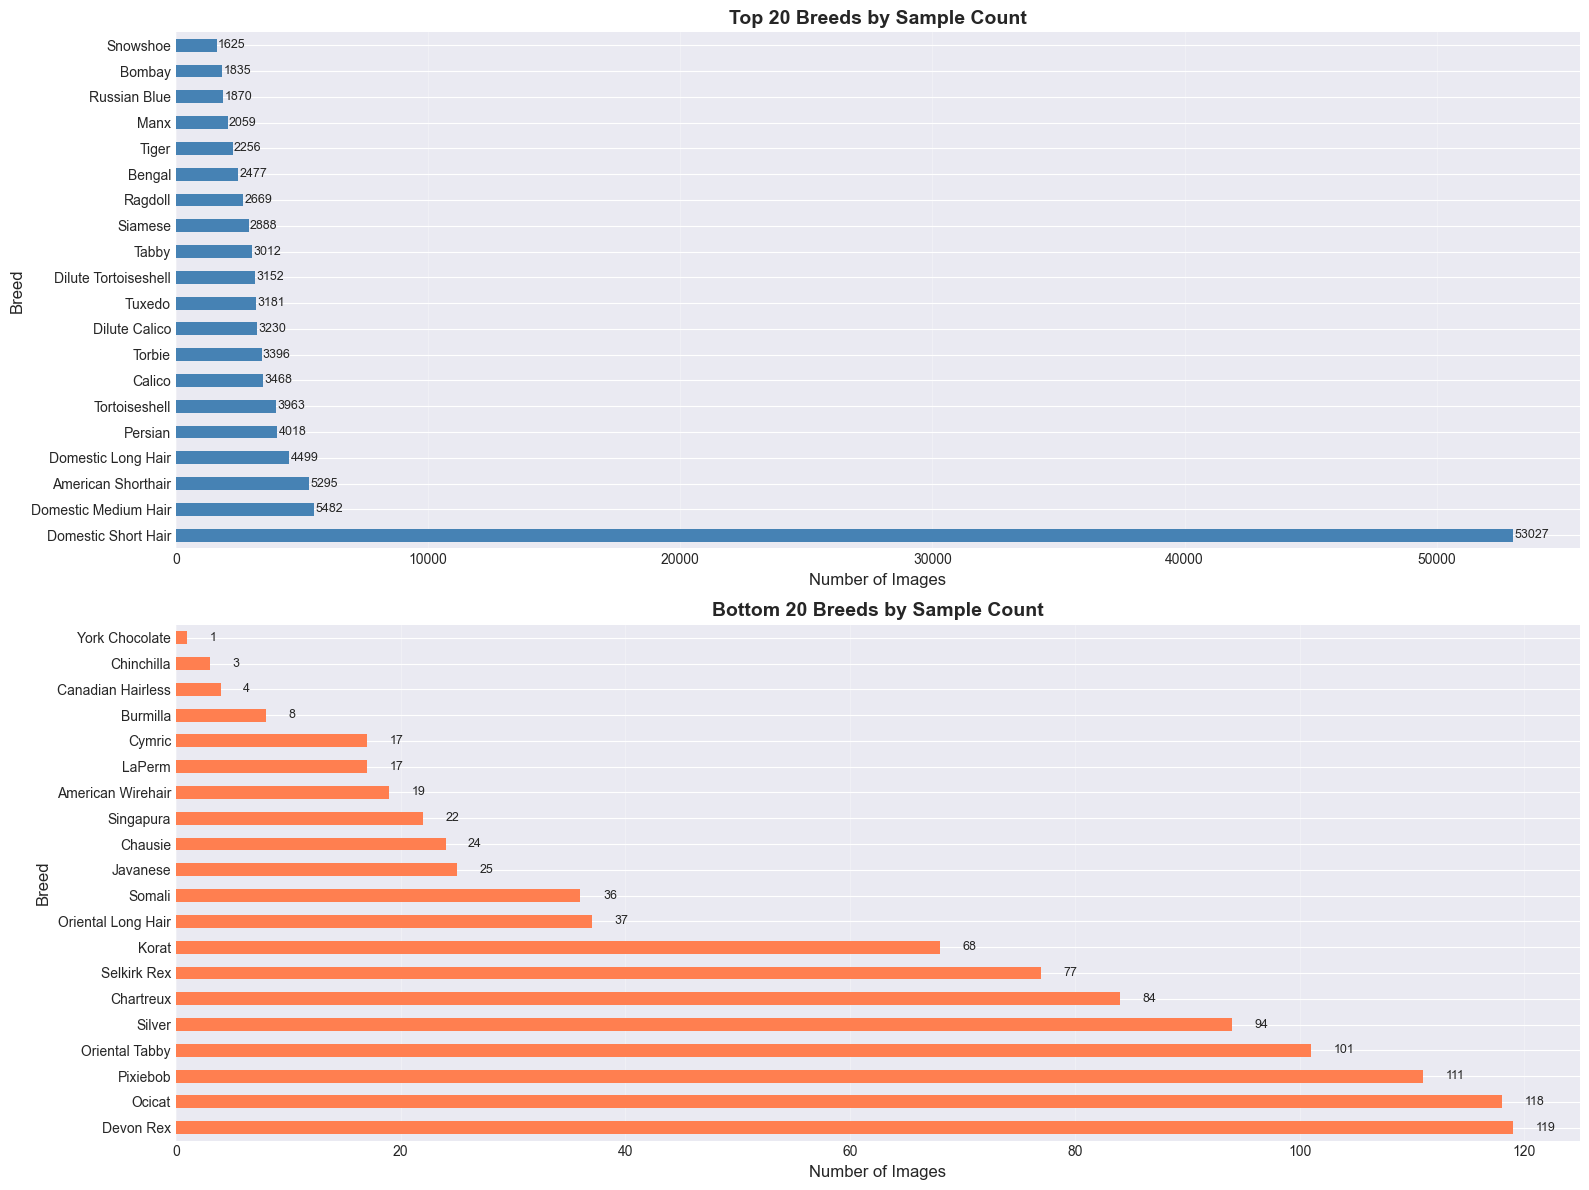

In [11]:
# Visualize class imbalance - Sorted bar chart
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Top 20 breeds
breed_counts.head(20).plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Top 20 Breeds by Sample Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Images', fontsize=12)
axes[0].set_ylabel('Breed', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(breed_counts.head(20).values):
    axes[0].text(v + 50, i, str(v), va='center', fontsize=9)

# Bottom 20 breeds
breed_counts.tail(20).plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Bottom 20 Breeds by Sample Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Images', fontsize=12)
axes[1].set_ylabel('Breed', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(breed_counts.tail(20).values):
    axes[1].text(v + 2, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

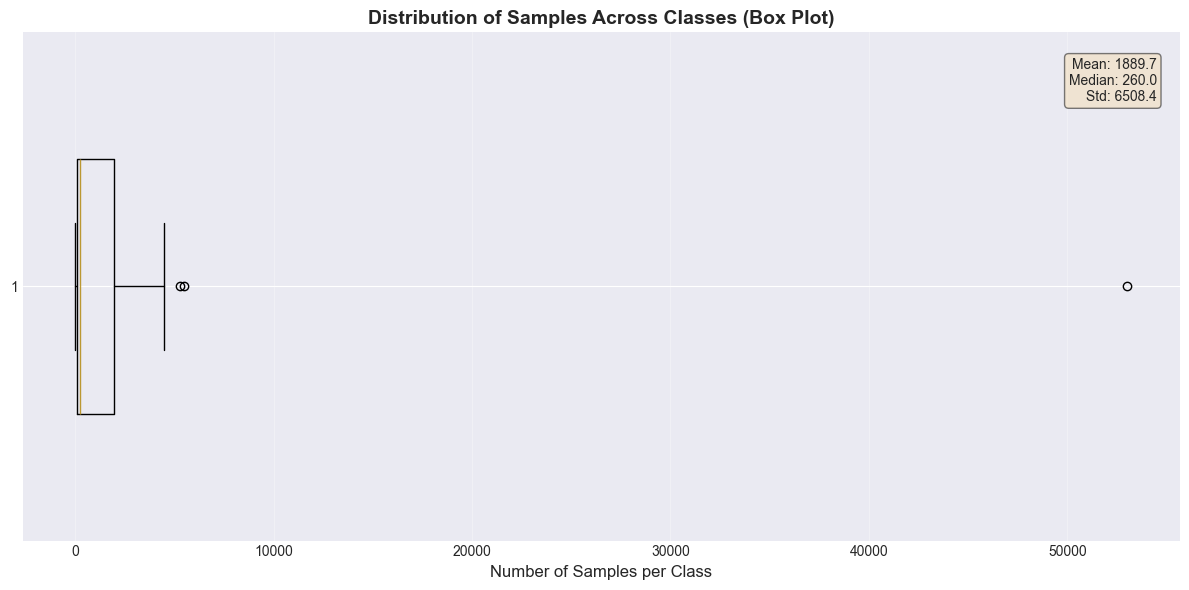

In [12]:
# Box plot of sample counts
fig, ax = plt.subplots(figsize=(12, 6))

ax.boxplot([breed_counts.values], vert=False, widths=0.5)
ax.set_xlabel('Number of Samples per Class', fontsize=12)
ax.set_title('Distribution of Samples Across Classes (Box Plot)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add statistics annotations
stats_text = f"Mean: {breed_counts.mean():.1f}\nMedian: {breed_counts.median():.1f}\nStd: {breed_counts.std():.1f}"
ax.text(0.98, 0.95, stats_text, transform=ax.transAxes, 
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

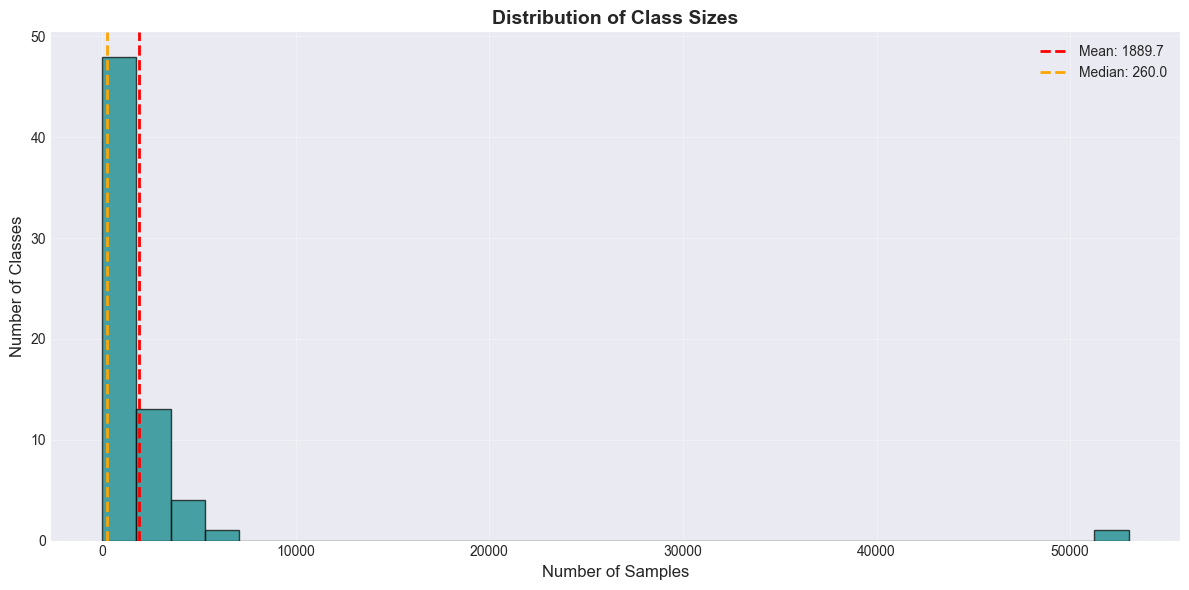

In [13]:
# Histogram of class sizes
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(breed_counts.values, bins=30, color='teal', alpha=0.7, edgecolor='black')
ax.axvline(breed_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {breed_counts.mean():.1f}')
ax.axvline(breed_counts.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {breed_counts.median():.1f}')

ax.set_xlabel('Number of Samples', fontsize=12)
ax.set_ylabel('Number of Classes', fontsize=12)
ax.set_title('Distribution of Class Sizes', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

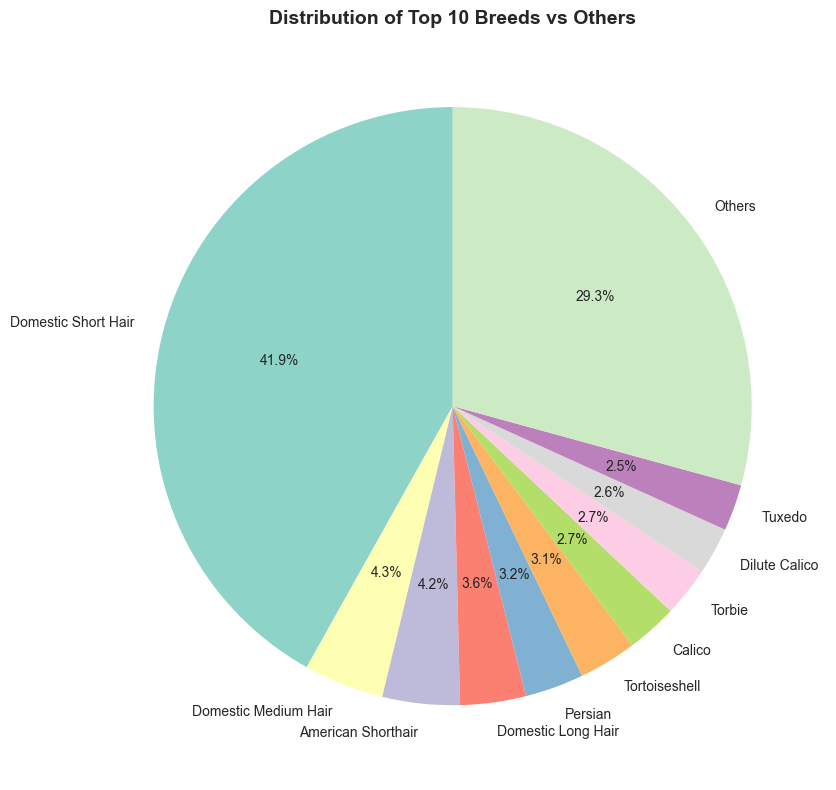

In [14]:
# Pie chart for top breeds
fig, ax = plt.subplots(figsize=(12, 8))

top_n = 10
top_breeds = breed_counts.head(top_n)
other_count = breed_counts.iloc[top_n:].sum()

# Combine top breeds with 'Others'
pie_data = list(top_breeds.values) + [other_count]
pie_labels = list(top_breeds.index) + ['Others']

colors = plt.cm.Set3(range(len(pie_data)))
wedges, texts, autotexts = ax.pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
                                    startangle=90, colors=colors, textprops={'fontsize': 10})

ax.set_title(f'Distribution of Top {top_n} Breeds vs Others', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Recommendations for Handling Class Imbalance

Based on the analysis above, here are recommendations for handling the class imbalance:

In [15]:
print("="*60)
print("RECOMMENDATIONS FOR HANDLING CLASS IMBALANCE")
print("="*60)

print("\n1. DATA AUGMENTATION (Recommended for minority classes)")
print("   - Apply aggressive augmentation to classes with < 100 samples")
print("   - Techniques: rotation, flipping, zooming, color jittering, cropping")
print(f"   - Classes needing augmentation: {len(breed_counts[breed_counts < 100])}")

print("\n2. CLASS WEIGHTING")
print("   - Use computed class weights during model training")
print("   - Penalize misclassification of minority classes more heavily")
print("   - Weight range: {:.4f} to {:.4f}".format(min(class_weights), max(class_weights)))

print("\n3. OVERSAMPLING STRATEGIES")
print("   - Duplicate minority class samples")
print("   - Use SMOTE-like techniques (for feature space)")
print("   - Consider synthetic image generation (GANs, diffusion models)")

print("\n4. UNDERSAMPLING (Use with caution)")
print("   - Reduce majority class samples to balance dataset")
print("   - May lose valuable information")
print(f"   - Would reduce dataset from {len(df_images):,} to ~{len(breed_counts) * breed_counts.median():.0f} images")

print("\n5. STRATIFIED SAMPLING")
print("   - Ensure train/val/test splits maintain class proportions")
print("   - Use stratified k-fold cross-validation")

print("\n6. ENSEMBLE METHODS")
print("   - Train multiple models on different balanced subsets")
print("   - Combine predictions for better generalization")

print("\n7. FOCAL LOSS")
print("   - Use focal loss instead of cross-entropy")
print("   - Automatically focuses on hard-to-classify examples")

print("\n8. CONSIDER HIERARCHICAL CLASSIFICATION")
print("   - Group similar breeds together")
print("   - Use two-stage classification (coarse -> fine)")

RECOMMENDATIONS FOR HANDLING CLASS IMBALANCE

1. DATA AUGMENTATION (Recommended for minority classes)
   - Apply aggressive augmentation to classes with < 100 samples
   - Techniques: rotation, flipping, zooming, color jittering, cropping
   - Classes needing augmentation: 16

2. CLASS WEIGHTING
   - Use computed class weights during model training
   - Penalize misclassification of minority classes more heavily
   - Weight range: 0.0356 to 1889.6567

3. OVERSAMPLING STRATEGIES
   - Duplicate minority class samples
   - Use SMOTE-like techniques (for feature space)
   - Consider synthetic image generation (GANs, diffusion models)

4. UNDERSAMPLING (Use with caution)
   - Reduce majority class samples to balance dataset
   - May lose valuable information
   - Would reduce dataset from 126,607 to ~17420 images

5. STRATIFIED SAMPLING
   - Ensure train/val/test splits maintain class proportions
   - Use stratified k-fold cross-validation

6. ENSEMBLE METHODS
   - Train multiple models on 

## 5. Image Analysis <a id='images'></a>

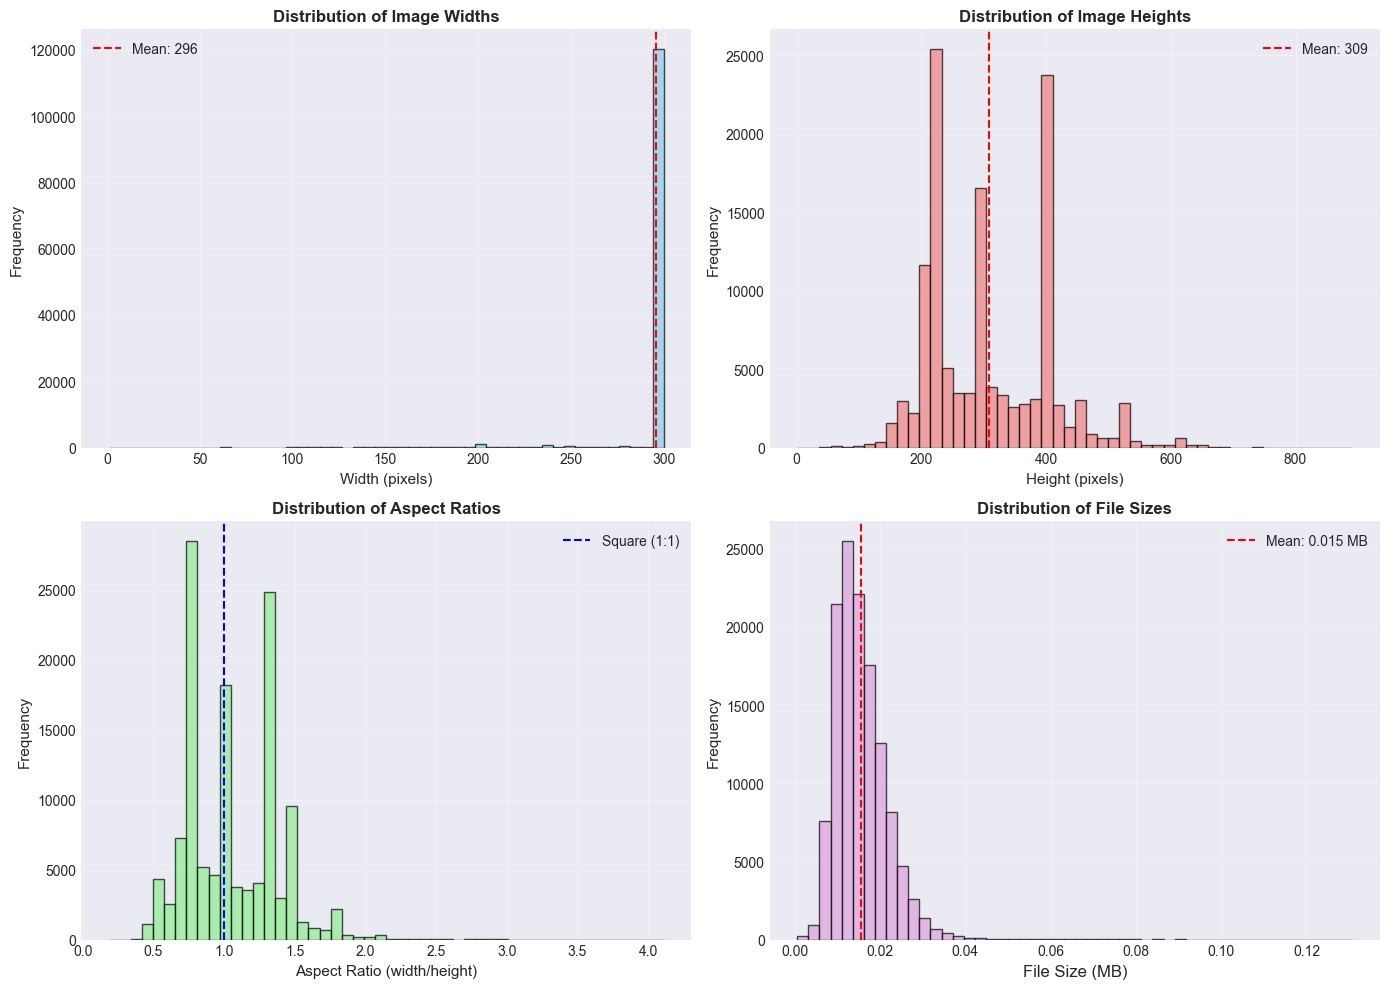

In [16]:
# Image dimensions analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Width distribution
axes[0, 0].hist(df_images['width'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Width (pixels)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Image Widths', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df_images['width'].mean(), color='red', linestyle='--', label=f'Mean: {df_images["width"].mean():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Height distribution
axes[0, 1].hist(df_images['height'].dropna(), bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Height (pixels)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Image Heights', fontsize=12, fontweight='bold')
axes[0, 1].axvline(df_images['height'].mean(), color='red', linestyle='--', label=f'Mean: {df_images["height"].mean():.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Aspect ratio distribution
axes[1, 0].hist(df_images['aspect_ratio'].dropna(), bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Aspect Ratio (width/height)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Aspect Ratios', fontsize=12, fontweight='bold')
axes[1, 0].axvline(1.0, color='blue', linestyle='--', label='Square (1:1)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# File size distribution
axes[1, 1].hist(df_images['file_size_mb'].dropna(), bins=50, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('File Size (MB)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Distribution of File Sizes', fontsize=12, fontweight='bold')
axes[1, 1].axvline(df_images['file_size_mb'].mean(), color='red', linestyle='--', label=f'Mean: {df_images["file_size_mb"].mean():.3f} MB')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

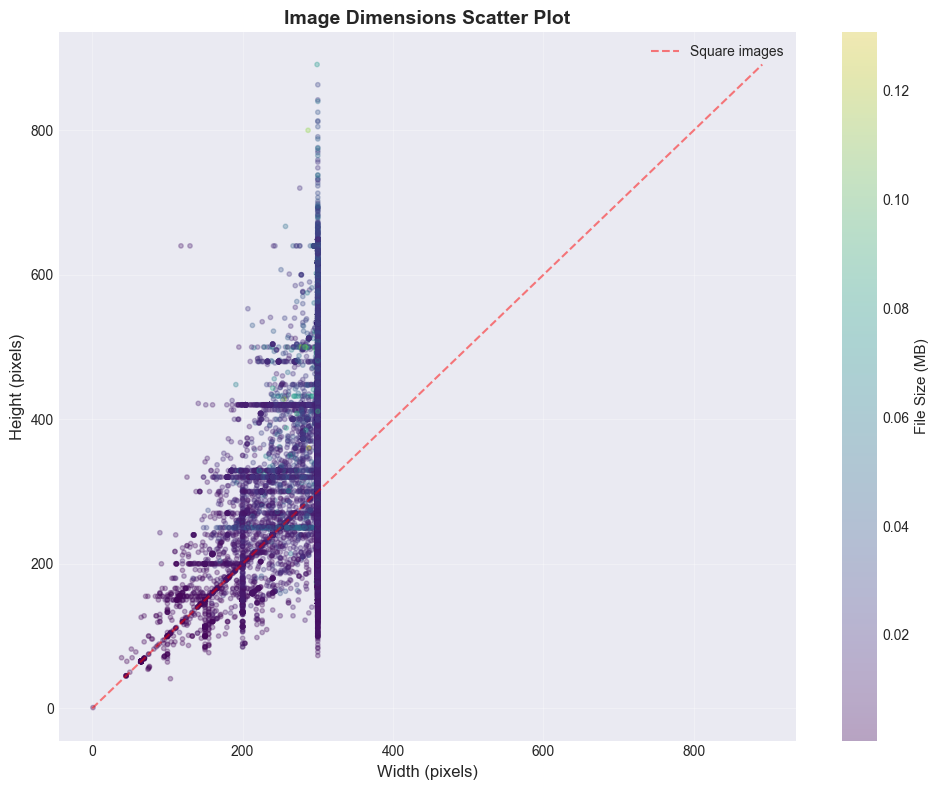

In [17]:
# Scatter plot: width vs height
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df_images['width'], df_images['height'], 
                     alpha=0.3, s=10, c=df_images['file_size_mb'], 
                     cmap='viridis')

ax.set_xlabel('Width (pixels)', fontsize=12)
ax.set_ylabel('Height (pixels)', fontsize=12)
ax.set_title('Image Dimensions Scatter Plot', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# Add diagonal line for square images
max_dim = max(df_images['width'].max(), df_images['height'].max())
ax.plot([0, max_dim], [0, max_dim], 'r--', alpha=0.5, label='Square images')
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('File Size (MB)', fontsize=11)

plt.tight_layout()
plt.show()

In [18]:
# Summary statistics for image properties
print("\nImage Properties Summary Statistics:")
print("="*60)
print(df_images[['width', 'height', 'aspect_ratio', 'file_size_mb']].describe())


Image Properties Summary Statistics:
               width         height   aspect_ratio   file_size_mb
count  126607.000000  126607.000000  126607.000000  126607.000000
mean      296.034042     308.641765       1.055568       0.015486
std        20.342016      98.894527       0.327317       0.006264
min         1.000000       1.000000       0.184375       0.000586
25%       300.000000     225.000000       0.750000       0.011130
50%       300.000000     300.000000       1.000000       0.014428
75%       300.000000     400.000000       1.333333       0.018730
max       300.000000     891.000000       4.109589       0.130738


## 6. Visualizations <a id='visualizations'></a>

Sample images from top 10 most common breeds:


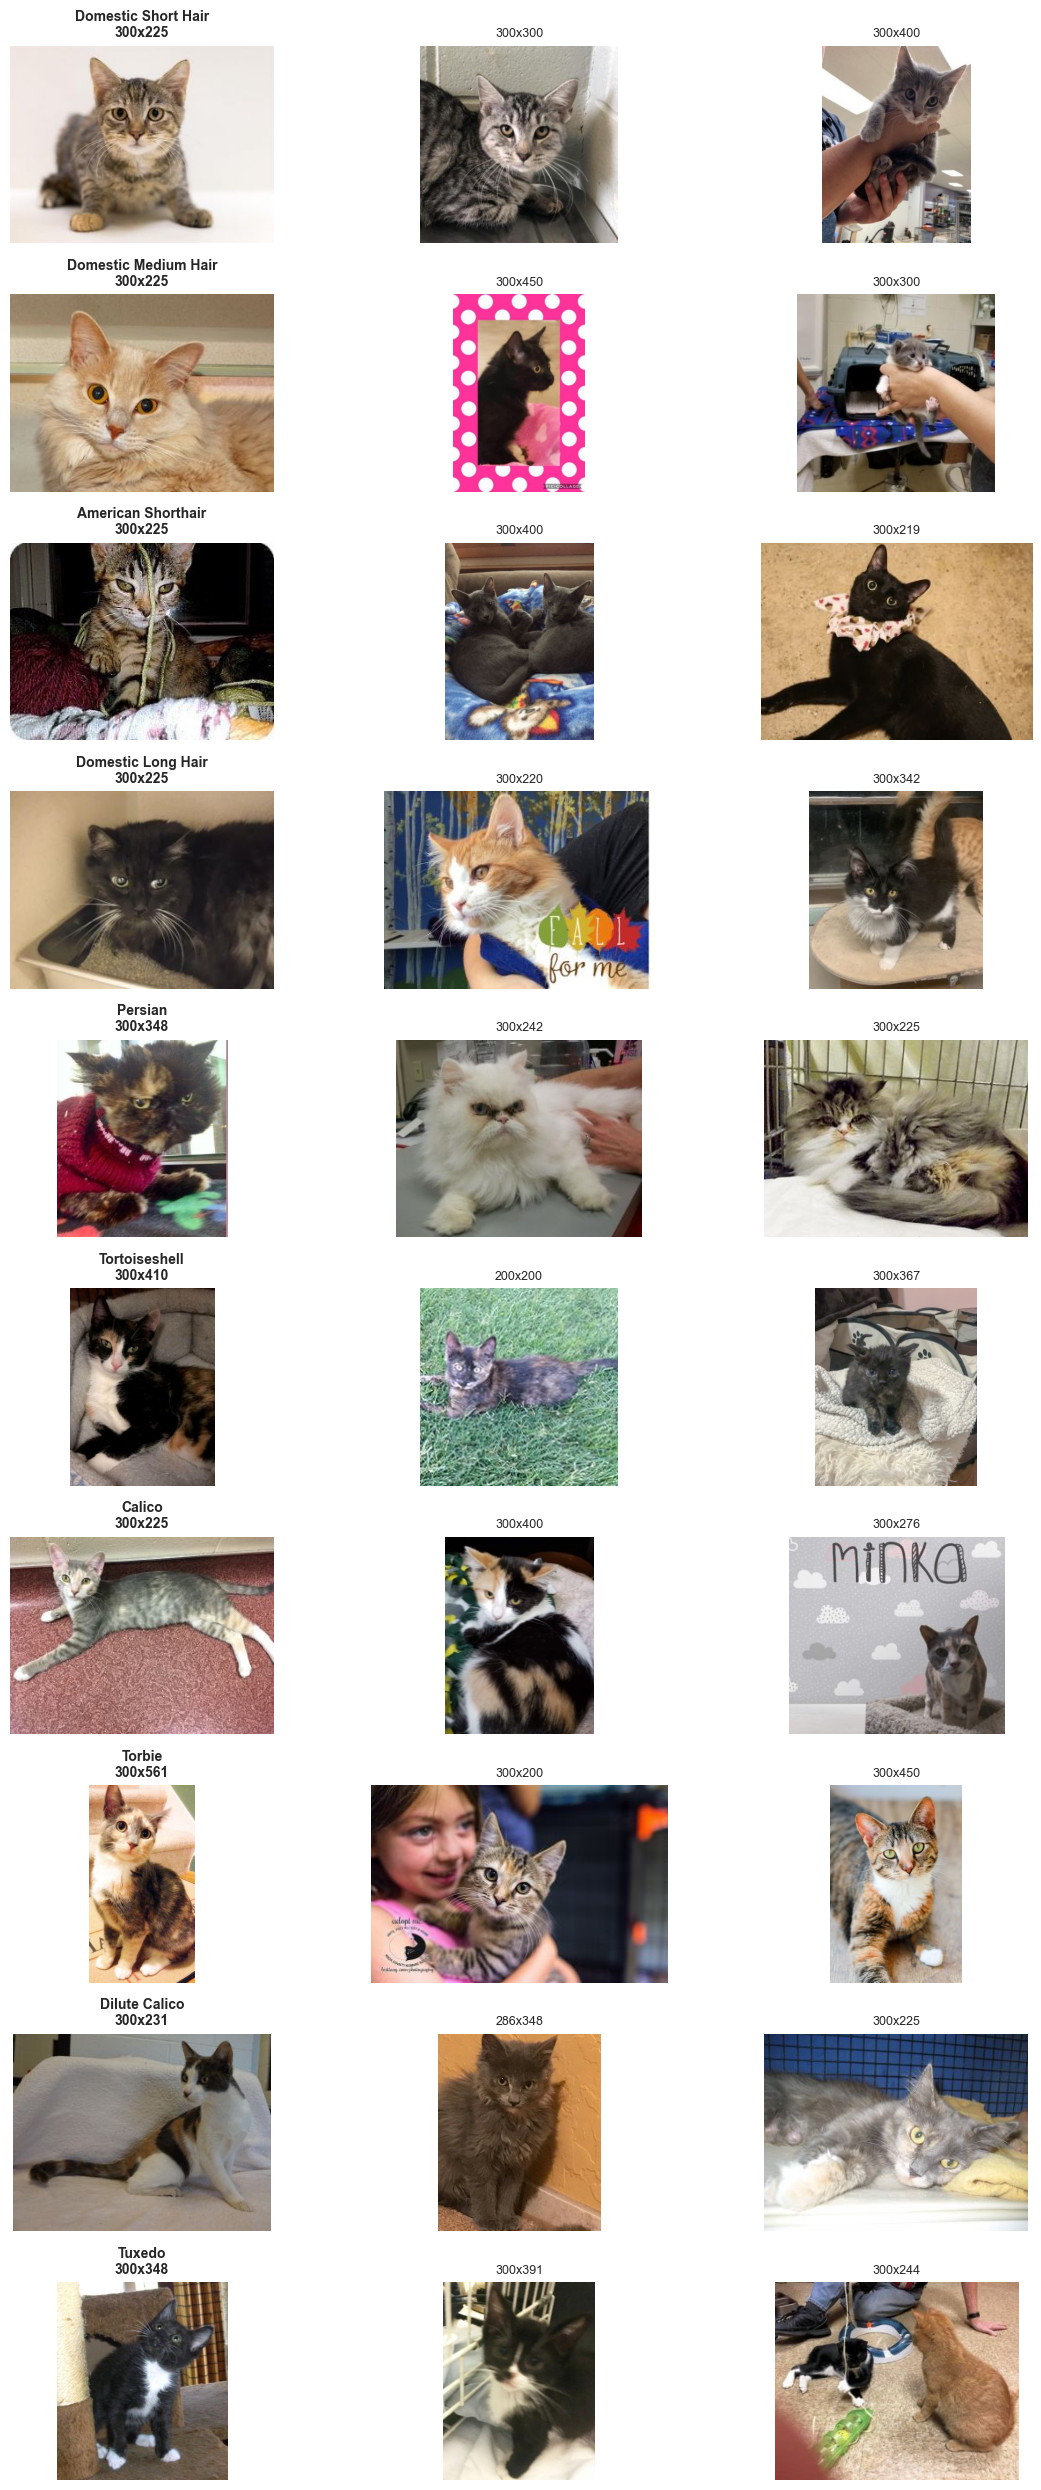

In [19]:
# Sample images from different breeds
def display_sample_images(df, breeds, n_samples=3, figsize=(15, 10)):
    """
    Display sample images from specified breeds
    """
    n_breeds = len(breeds)
    fig, axes = plt.subplots(n_breeds, n_samples, figsize=figsize)
    
    if n_breeds == 1:
        axes = axes.reshape(1, -1)
    
    for i, breed in enumerate(breeds):
        breed_images = df[df['breed'] == breed].sample(min(n_samples, len(df[df['breed'] == breed])))
        
        for j, (_, row) in enumerate(breed_images.iterrows()):
            try:
                img = Image.open(row['file_path'])
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                
                if j == 0:
                    axes[i, j].set_title(f"{breed}\n{img.size[0]}x{img.size[1]}", 
                                        fontsize=10, fontweight='bold')
                else:
                    axes[i, j].set_title(f"{img.size[0]}x{img.size[1]}", fontsize=9)
            except Exception as e:
                axes[i, j].text(0.5, 0.5, 'Error loading image', 
                               ha='center', va='center')
                axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display samples from top 10 breeds
top_breeds = breed_counts.head(10).index.tolist()
print(f"Sample images from top 10 most common breeds:")
display_sample_images(df_images, top_breeds, n_samples=3, figsize=(12, 25))

Sample images from 5 least common breeds:


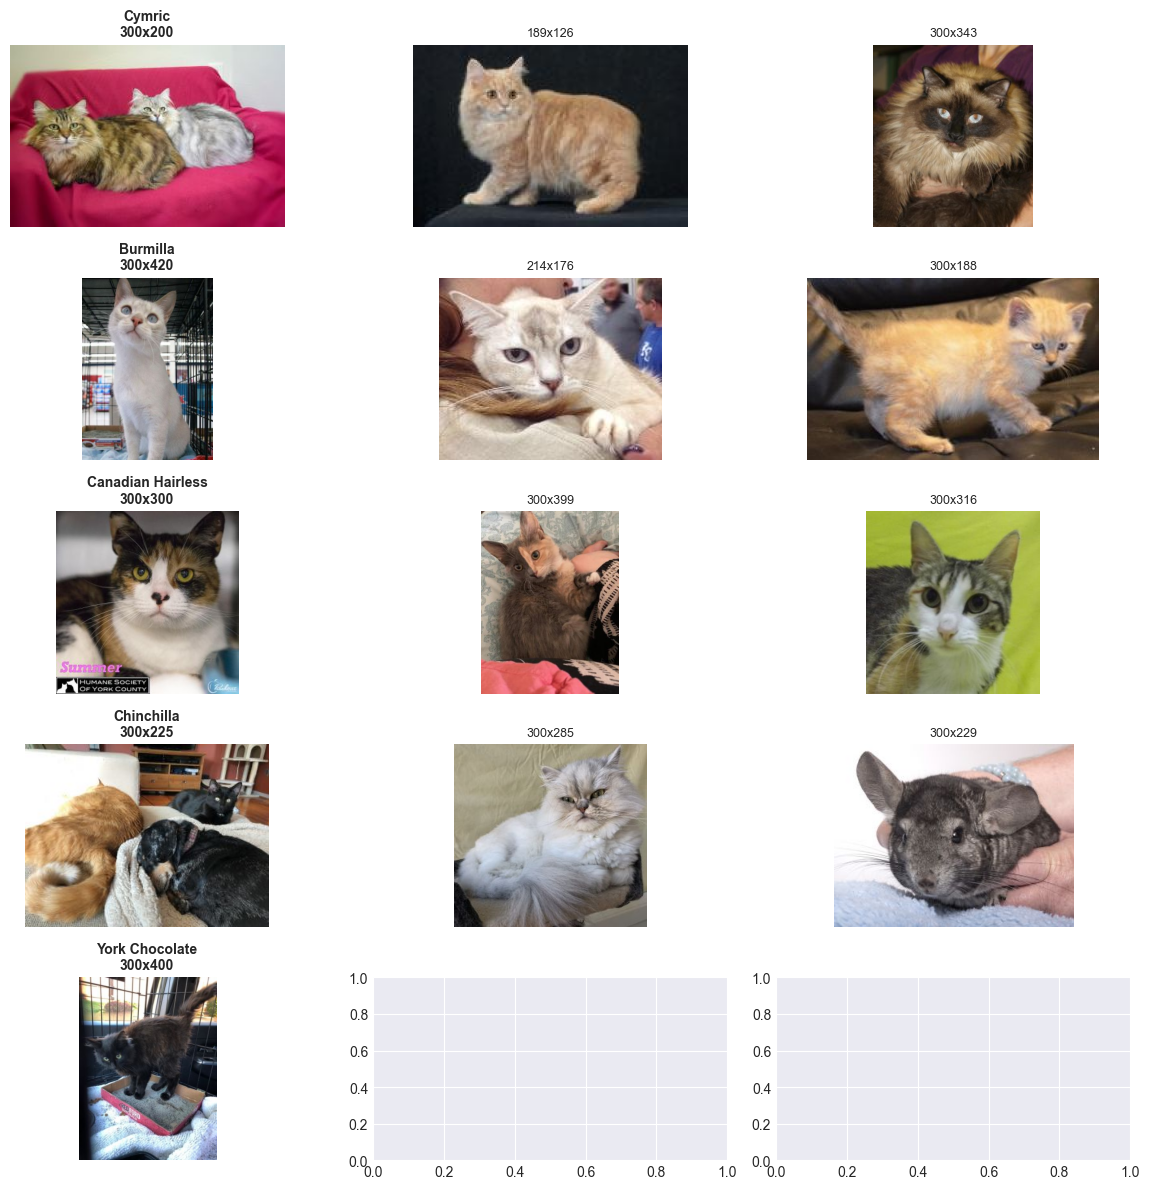

In [20]:
# Display samples from minority classes
bottom_breeds = breed_counts.tail(5).index.tolist()
print(f"Sample images from 5 least common breeds:")
display_sample_images(df_images, bottom_breeds, n_samples=3, figsize=(12, 12))

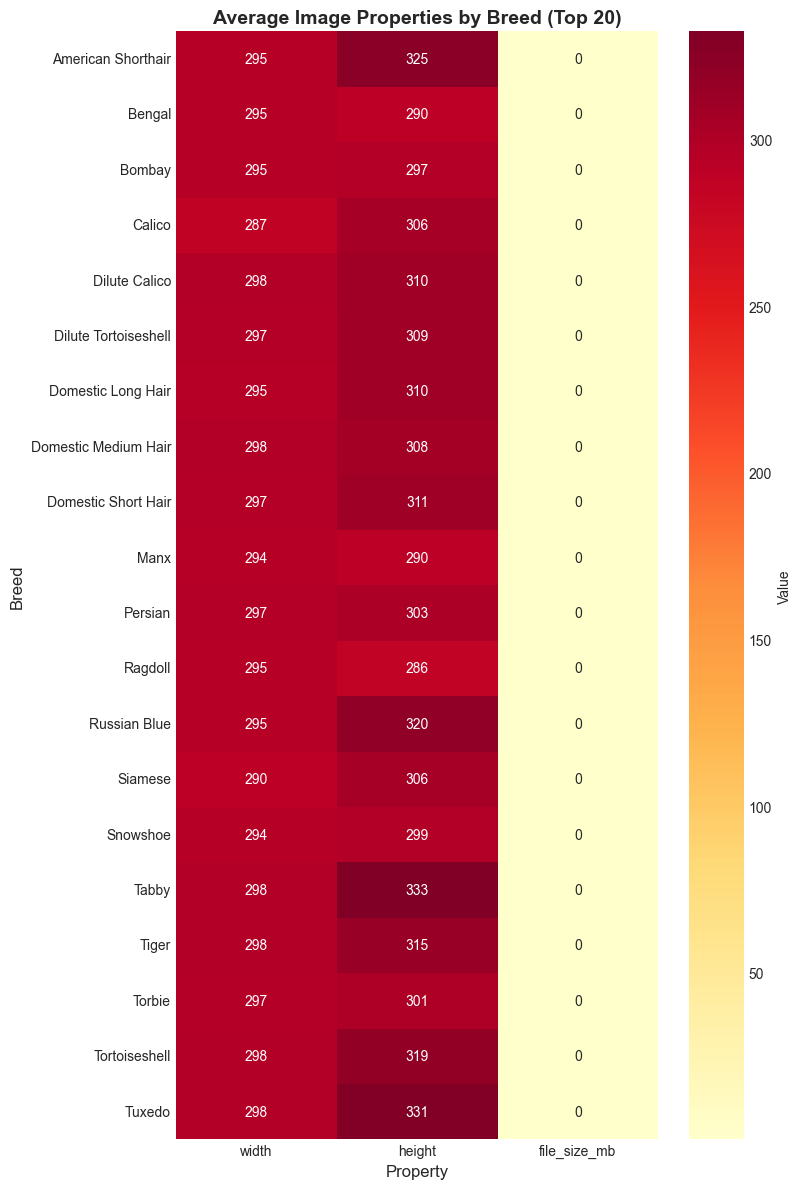

In [21]:
# Heatmap of average image dimensions by breed (top 20 breeds)
top_20_breeds = breed_counts.head(20).index
breed_dims = df_images[df_images['breed'].isin(top_20_breeds)].groupby('breed')[['width', 'height', 'file_size_mb']].mean()

fig, ax = plt.subplots(figsize=(8, 12))
sns.heatmap(breed_dims, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Value'})
ax.set_title('Average Image Properties by Breed (Top 20)', fontsize=14, fontweight='bold')
ax.set_xlabel('Property', fontsize=12)
ax.set_ylabel('Breed', fontsize=12)

plt.tight_layout()
plt.show()

## 7. Data Quality Checks <a id='quality'></a>

In [22]:
print("="*60)
print("DATA QUALITY CHECKS")
print("="*60)

# Check for corrupted images
print(f"\n1. Corrupted/Unreadable Images: {len(corrupted_indices)}")
if len(corrupted_indices) > 0:
    print("   Corrupted image indices:", corrupted_indices[:10], "..." if len(corrupted_indices) > 10 else "")

# Check for missing values
print(f"\n2. Missing Values:")
missing = df_images.isnull().sum()
print(missing[missing > 0])

# Check for duplicate file names
duplicates = df_images['file_name'].duplicated().sum()
print(f"\n3. Duplicate File Names: {duplicates}")

# Check for very small images
small_images = df_images[(df_images['width'] < 100) | (df_images['height'] < 100)]
print(f"\n4. Very Small Images (< 100px in any dimension): {len(small_images)}")
if len(small_images) > 0:
    print("   Examples:")
    print(small_images[['breed', 'width', 'height', 'file_name']].head())

# Check for very large images
large_images = df_images[(df_images['width'] > 5000) | (df_images['height'] > 5000)]
print(f"\n5. Very Large Images (> 5000px in any dimension): {len(large_images)}")
if len(large_images) > 0:
    print("   Examples:")
    print(large_images[['breed', 'width', 'height', 'file_name']].head())

# Check for unusual aspect ratios
unusual_aspect = df_images[(df_images['aspect_ratio'] < 0.5) | (df_images['aspect_ratio'] > 2.0)]
print(f"\n6. Unusual Aspect Ratios (< 0.5 or > 2.0): {len(unusual_aspect)}")
if len(unusual_aspect) > 0:
    print(f"   Percentage: {len(unusual_aspect)/len(df_images)*100:.2f}%")

# Check color modes
print(f"\n7. Color Modes:")
mode_counts = df_images['mode'].value_counts()
for mode, count in mode_counts.items():
    print(f"   {mode}: {count:,} ({count/len(df_images)*100:.2f}%)")

# Check for very small file sizes (potentially corrupted)
tiny_files = df_images[df_images['file_size_mb'] < 0.01]
print(f"\n8. Very Small Files (< 10 KB): {len(tiny_files)}")
if len(tiny_files) > 0:
    print("   These files may be corrupted or placeholder images")

DATA QUALITY CHECKS

1. Corrupted/Unreadable Images: 0

2. Missing Values:
Series([], dtype: int64)

3. Duplicate File Names: 0

4. Very Small Images (< 100px in any dimension): 211
   Examples:
                   breed  width  height          file_name
112           Abyssinian     65      65   37942697_233.jpg
141           Abyssinian    104      41   14210840_249.jpg
1041    American Bobtail     75      56  22250875_3930.jpg
1285       American Curl    300      88   27079609_433.jpg
2166  American Shorthair     65      65  42551461_8084.jpg

5. Very Large Images (> 5000px in any dimension): 0

6. Unusual Aspect Ratios (< 0.5 or > 2.0): 1859
   Percentage: 1.47%

7. Color Modes:
   RGB: 126,603 (100.00%)
   CMYK: 2 (0.00%)
   P: 1 (0.00%)
   RGBA: 1 (0.00%)

8. Very Small Files (< 10 KB): 20846
   These files may be corrupted or placeholder images


In [23]:
# Create a clean dataset (optional)
print("\nCreating clean dataset by removing problematic images...")

df_clean = df_images.copy()

# Remove corrupted images
if len(corrupted_indices) > 0:
    df_clean = df_clean.drop(corrupted_indices)

# Remove very small images
df_clean = df_clean[(df_clean['width'] >= 50) & (df_clean['height'] >= 50)]

# Remove very small files
df_clean = df_clean[df_clean['file_size_mb'] >= 0.01]

print(f"\nOriginal dataset: {len(df_images):,} images")
print(f"Clean dataset: {len(df_clean):,} images")
print(f"Removed: {len(df_images) - len(df_clean):,} images ({(len(df_images) - len(df_clean))/len(df_images)*100:.2f}%)")


Creating clean dataset by removing problematic images...

Original dataset: 126,607 images
Clean dataset: 105,761 images
Removed: 20,846 images (16.47%)


## 8. Summary and Recommendations <a id='summary'></a>

In [24]:
print("="*60)
print("SUMMARY AND RECOMMENDATIONS")
print("="*60)

print("\n📊 DATASET OVERVIEW")
print(f"   • Total images: {len(df_images):,}")
print(f"   • Number of breeds: {df_images['breed'].nunique()}")
print(f"   • Clean images: {len(df_clean):,}")
print(f"   • Average images per breed: {breed_counts.mean():.1f}")

print("\n⚠️  KEY FINDINGS")
print(f"   • Severe class imbalance detected (ratio: {imbalance_ratio:.2f}:1)")
print(f"   • {len(minority_classes)} minority classes need attention")
print(f"   • Image dimensions vary significantly ({df_images['width'].min()}-{df_images['width'].max()}px)")
print(f"   • Predominant color mode: {df_images['mode'].mode()[0]}")
print(f"   • {len(corrupted_indices)} corrupted/unreadable images found")

print("\n🔧 PREPROCESSING RECOMMENDATIONS")
print("   1. Image Resizing:")
print(f"      - Standardize to a common size (e.g., 224x224 or 299x299)")
print(f"      - Use aspect-ratio preserving resize with padding/cropping")

print("\n   2. Data Augmentation:")
print("      - Apply to minority classes (< 100 samples)")
print("      - Techniques: rotation, flip, zoom, color jitter, crop")
print("      - Consider advanced augmentation (Mixup, CutMix)")

print("\n   3. Normalization:")
print("      - Normalize pixel values (0-1 or standardize)")
print("      - Use ImageNet statistics if using pretrained models")

print("\n   4. Train/Val/Test Split:")
print("      - Use stratified split to maintain class proportions")
print("      - Suggested ratio: 70/15/15 or 80/10/10")

print("\n📈 MODELING RECOMMENDATIONS")
print("   1. Use transfer learning (ResNet, EfficientNet, ViT)")
print("   2. Apply class weights during training")
print("   3. Use focal loss or weighted cross-entropy")
print("   4. Implement stratified k-fold cross-validation")
print("   5. Monitor per-class metrics (precision, recall, F1)")
print("   6. Consider ensemble methods for better performance")

print("\n💾 DATA MANAGEMENT")
print("   1. Remove corrupted images before training")
print("   2. Create a metadata CSV for easy loading")
print("   3. Consider creating separate folders for train/val/test")
print("   4. Document any preprocessing steps")

print("\n" + "="*60)
print("EDA COMPLETE!")
print("="*60)

SUMMARY AND RECOMMENDATIONS

📊 DATASET OVERVIEW
   • Total images: 126,607
   • Number of breeds: 67
   • Clean images: 105,761
   • Average images per breed: 1889.7

⚠️  KEY FINDINGS
   • Severe class imbalance detected (ratio: 53027.00:1)
   • 17 minority classes need attention
   • Image dimensions vary significantly (1-300px)
   • Predominant color mode: RGB
   • 0 corrupted/unreadable images found

🔧 PREPROCESSING RECOMMENDATIONS
   1. Image Resizing:
      - Standardize to a common size (e.g., 224x224 or 299x299)
      - Use aspect-ratio preserving resize with padding/cropping

   2. Data Augmentation:
      - Apply to minority classes (< 100 samples)
      - Techniques: rotation, flip, zoom, color jitter, crop
      - Consider advanced augmentation (Mixup, CutMix)

   3. Normalization:
      - Normalize pixel values (0-1 or standardize)
      - Use ImageNet statistics if using pretrained models

   4. Train/Val/Test Split:
      - Use stratified split to maintain class proportio

In [25]:
# Save clean metadata to CSV
output_path = DATA_DIR / 'clean_metadata.csv'
df_clean.to_csv(output_path, index=False)
print(f"\n✓ Clean metadata saved to: {output_path}")
print(f"  Columns: {list(df_clean.columns)}")
print(f"  Shape: {df_clean.shape}")


✓ Clean metadata saved to: data/clean_metadata.csv
  Columns: ['breed', 'file_path', 'file_name', 'file_size_bytes', 'width', 'height', 'mode', 'aspect_ratio', 'file_size_mb']
  Shape: (105761, 9)
